Contents

1. Importing Libraries
2. Importing Data Sets
3. Data Security Implications
4. Regional Segmentation
5. Exclusion Flag
6. Customer Profiling
7. Distribution of Profiles Visualization
8. Usage Frequency and Expenditure
9. Comparing Customer Profiles by Regions & Departments
10. Key Question Visualizations

# 01. Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data Sets

In [2]:
# Set path
path = r'C:/Users/jeong/OneDrive/Desktop/CF Files/Achievement 4/07-2023 Instacart Basket Analysis'

In [3]:
# Import ords_prods_cust data set
df_ords_prods_cust = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
# Check the data 
df_ords_prods_cust.head()

,user_id,first_name,last_name,sex,state,age,date_joined,n_dependants,martial_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_last_order,last_order_frequency,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regulary busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regulary busy,Regulary busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regulary busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regulary busy,Regulary busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regulary busy,Least busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
df_ords_prods_cust = df_ords_prods_cust.drop(columns = ['_merge'])

In [6]:
df_ords_prods_cust.shape

(32404859, 32)

# 03. Data Security Implications

The columns "first_name" and "last_name" are PII data and therefore should be addressed accordingly.

In [7]:
# Drop "first_name" column
ords_prods_cust = df_ords_prods_cust.drop(columns = ['first_name'])

In [8]:
# Drop "last_name" column
ords_prods_cust = ords_prods_cust.drop(columns = ['last_name'])

In [9]:
# Check updated dataframe
ords_prods_cust.head()

,user_id,sex,state,age,date_joined,n_dependants,martial_status,income,order_id,order_number,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_last_order,last_order_frequency
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Mid range product,Regulary busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid range product,Regulary busy,Regulary busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Mid range product,Regulary busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Mid range product,Regulary busy,Regulary busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Mid range product,Regulary busy,Least busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer


# 04. Regional Segmentation

Create region flags using the "state" column and then analysis the results using a crosstab

In [10]:
# Create regions using the "states" column
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
# Create region flag
ords_prods_cust.loc[ords_prods_cust['state'].isin(Northeast), 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'].isin(Midwest), 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'].isin(South), 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'].isin(West), 'region'] = 'West'

In [12]:
# Check value counts
ords_prods_cust['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
# Create crosstab with spending_flag
crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


In [15]:
crosstab.to_clipboard()

# 05. Exclusion Flag 

Create an exclusion flag for low-activity customers and exclude the from the data

In [16]:
# Create exclusion flag using max_order column
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'exclusion_flag'] = 'High activity customer'

In [17]:
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [18]:
# Check frequency of exclusion flag
ords_prods_cust['exclusion_flag'].value_counts(dropna = False)

High activity customer    30964564
Low activity customer      1440295
Name: exclusion_flag, dtype: int64

In [19]:
# Create sample with low activity customers
df_low_cust = ords_prods_cust[ords_prods_cust['exclusion_flag']== 'Low activity customer']

In [20]:
# Check number of rows
df_low_cust.shape

(1440295, 32)

In [21]:
# Export the sample

df_low_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [22]:
# Exclude low activity customers from dataframe

ords_prods_cust_1 = ords_prods_cust[ords_prods_cust['exclusion_flag']== 'High activity customer']

In [23]:
# Check number of rows
ords_prods_cust_1.shape

(30964564, 32)

# 06. Customer Profiling

### 06.01 Age Groups

In [24]:
# Summary statistics of "age" column to choose which ages to group by
ords_prods_cust_1['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [25]:
# Group customers by 3 age ranges: young adult, middle age and elderly based on the "age" column.
# Age ranges were created roughly using the 3 quartiles 

ords_prods_cust_1.loc[ords_prods_cust['age'] >= 65, 'age_group'] = 'Senior'

C:\Users\jeong\AppData\Local\Temp\ipykernel_11944\112712145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_1.loc[ords_prods_cust['age'] >= 65, 'age_group'] = 'Senior'


In [26]:
ords_prods_cust_1.loc[(ords_prods_cust['age'] < 65) & (ords_prods_cust['age'] >= 35), 'age_group'] = 'Middle-aged'

In [27]:
ords_prods_cust_1.loc[ords_prods_cust['age'] < 35, 'age_group'] = 'Young adult'

In [28]:
# Check frequency of flags
ords_prods_cust_1['age_group'].value_counts(dropna = False)

Middle-aged    14526725
Young adult     8242295
Senior          8195544
Name: age_group, dtype: int64

### 06.02 Income Groups

In [29]:
# Summary statistics of "income" column to choose which income to group by
ords_prods_cust_1['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [30]:
# Group customers by 3 income levels: low, middle and upper based on the "income" column.
ords_prods_cust_1.loc[ords_prods_cust['income'] >= 125000, 'income_bracket'] = 'Upper Income'

C:\Users\jeong\AppData\Local\Temp\ipykernel_11944\851467321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_1.loc[ords_prods_cust['income'] >= 125000, 'income_bracket'] = 'Upper Income'


In [31]:
ords_prods_cust_1.loc[(ords_prods_cust['income'] < 125000) & (ords_prods_cust['income'] >= 70000), 'income_bracket'] = 'Middle Income'

In [32]:
ords_prods_cust_1.loc[ords_prods_cust['income'] < 70000, 'income_bracket'] = 'Low Income'

In [33]:
# Check frequency
ords_prods_cust_1['income_bracket'].value_counts(dropna = False)

Middle Income    14165987
Low Income        8520533
Upper Income      8278044
Name: income_bracket, dtype: int64

### 06.03 Departments

In [34]:
# Create new variable for department names 
# Could also merge df_depts with current dataframe, however, not enough memory could be allocated
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 1, 'department'] = 'frozen'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 2, 'department'] = 'other'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 3, 'department'] = 'bakery'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 4, 'department'] = 'produce'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 5, 'department'] = 'alcohol'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 6, 'department'] = 'international'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 7, 'department'] = 'beverages'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 8, 'department'] = 'pets'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 9, 'department'] = 'dry goods'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 10, 'department'] = 'bulk'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 11, 'department'] = 'personal care'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 12, 'department'] = 'meat/seafood'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 13, 'department'] = 'pantry'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 14, 'department'] = 'breakfast'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 15, 'department'] = 'canned goods'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 16, 'department'] = 'dairy'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 17, 'department'] = 'household'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 18, 'department'] = 'babies'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 19, 'department'] = 'snacks'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 20, 'department'] = 'deli'
ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 21, 'department'] = 'missing' 

C:\Users\jeong\AppData\Local\Temp\ipykernel_11944\889173154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_1.loc[ords_prods_cust_1['department_id'] == 1, 'department'] = 'frozen'


In [35]:
# Check frequency
ords_prods_cust_1['department'].value_counts(dropna = False)

produce          9079273
dairy            5177182
snacks           2766406
beverages        2571901
frozen           2121731
pantry           1782705
bakery           1120828
canned goods     1012074
deli             1003834
dry goods         822136
household         699857
meat/seafood      674781
breakfast         670850
personal care     424306
babies            410392
international     255991
alcohol           144627
pets               93060
missing            64768
other              34411
bulk               33451
Name: department, dtype: int64

### 06.04 Dependant Groups

In [36]:
# Group customers by parents (has dependants) & no children (no dependants)

ords_prods_cust_1.loc[ords_prods_cust_1['n_dependants'] > 0, 'dependants_flag'] = 'parents'

C:\Users\jeong\AppData\Local\Temp\ipykernel_11944\3011648929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_1.loc[ords_prods_cust_1['n_dependants'] > 0, 'dependants_flag'] = 'parents'


In [37]:
ords_prods_cust_1.loc[ords_prods_cust_1['n_dependants'] == 0, 'dependants_flag'] = 'no children'

In [38]:
# Check frequency of dependants_flag
ords_prods_cust_1['dependants_flag'].value_counts(dropna = False)

parents        23224883
no children     7739681
Name: dependants_flag, dtype: int64

In [39]:
ords_prods_cust_1.head()

,user_id,sex,state,age,date_joined,n_dependants,martial_status,income,order_id,order_number,...,average_price,spending_flag,median_last_order,last_order_frequency,region,exclusion_flag,age_group,income_bracket,department,dependants_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,beverages,parents
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,beverages,parents
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,beverages,parents
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,dairy,parents
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,dairy,parents


## 06.1 Creating Customer Profiles


### 06.1.1 Customer Orders by day and hour

In [40]:
# Group all by day (Weekend or Weekday)
days = []

for i in ords_prods_cust_1['orders_day_of_the_week']:
    if i <= 1:
        days.append("Weekend")
    else:
        days.append("Weekday")

In [41]:
# Create column 'days'
ords_prods_cust_1['days'] = days

C:\Users\jeong\AppData\Local\Temp\ipykernel_11944\1074000663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_1['days'] = days


In [42]:
# Peak hours (Morning, evenings)
hours = []

for i in ords_prods_cust_1['order_hour_of_day']:
    if i >= 20 or i <= 4:
        hours.append("Night")
    elif i > 4 and i <= 11:
        hours.append("Morning")
    elif i > 11 and i <= 16:
        hours.append("Afternoon")
    else:
        hours.append("Evening")

In [43]:
# Create column "hours"
ords_prods_cust_1['hours'] = hours

C:\Users\jeong\AppData\Local\Temp\ipykernel_11944\3343495098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_1['hours'] = hours


In [44]:
ords_prods_cust_1.head(10)

,user_id,sex,state,age,date_joined,n_dependants,martial_status,income,order_id,order_number,...,median_last_order,last_order_frequency,region,exclusion_flag,age_group,income_bracket,department,dependants_flag,days,hours
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,beverages,parents,Weekend,Morning
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,beverages,parents,Weekday,Afternoon
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,beverages,parents,Weekend,Afternoon
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,dairy,parents,Weekday,Morning
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,dairy,parents,Weekday,Morning
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,...,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,dairy,parents,Weekend,Evening
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,dairy,parents,Weekend,Morning
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,dairy,parents,Weekday,Afternoon
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,dairy,parents,Weekend,Afternoon
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,...,19.0,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,produce,parents,Weekday,Morning


In [45]:
ords_prods_cust_1['order_day_hour'] = ords_prods_cust_1['days'] + ' ' + ords_prods_cust_1['hours'] + ' ' + 'shopper'

C:\Users\jeong\AppData\Local\Temp\ipykernel_11944\1659956873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_1['order_day_hour'] = ords_prods_cust_1['days'] + ' ' + ords_prods_cust_1['hours'] + ' ' + 'shopper'


In [46]:
ords_prods_cust_1.head()

,user_id,sex,state,age,date_joined,n_dependants,martial_status,income,order_id,order_number,...,last_order_frequency,region,exclusion_flag,age_group,income_bracket,department,dependants_flag,days,hours,order_day_hour
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,beverages,parents,Weekend,Morning,Weekend Morning shopper
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,beverages,parents,Weekday,Afternoon,Weekday Afternoon shopper
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,beverages,parents,Weekend,Afternoon,Weekend Afternoon shopper
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,dairy,parents,Weekday,Morning,Weekday Morning shopper
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regular customer,Midwest,High activity customer,Middle-aged,Upper Income,dairy,parents,Weekday,Morning,Weekday Morning shopper


In [47]:
ords_prods_cust_1['order_day_hour'].value_counts(dropna = False)

Weekday Afternoon shopper    7851585
Weekday Morning shopper      6568102
Weekend Afternoon shopper    4701036
Weekend Morning shopper      3947887
Weekday Evening shopper      3126708
Weekday Night shopper        2097873
Weekend Evening shopper      1600699
Weekend Night shopper        1070674
Name: order_day_hour, dtype: int64

### 06.1.2 Customer Profile 

In [48]:
# Create customer profile using "age_group", "income_bracket", "dependants_flag"
ords_prods_cust_1['customer_profile'] = ords_prods_cust_1['age_group'] + ' ' + ords_prods_cust_1['dependants_flag']

C:\Users\jeong\AppData\Local\Temp\ipykernel_11944\3919530208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_1['customer_profile'] = ords_prods_cust_1['age_group'] + ' ' + ords_prods_cust_1['dependants_flag']


In [49]:
# Check frequency
ords_prods_cust_1['customer_profile'].value_counts(dropna = False)

Middle-aged parents        10872560
Young adult parents         6178737
Senior parents              6173586
Middle-aged no children     3654165
Young adult no children     2063558
Senior no children          2021958
Name: customer_profile, dtype: int64

In [50]:
# Create dataframe of customer profile with other columns to further specify customer profile
cust_prof = ords_prods_cust_1.groupby(['user_id', 'region', 'customer_profile', 'martial_status', 'income_bracket', 'order_day_hour']).agg({'department':pd.Series.mode}).reset_index()

In [51]:
cust_prof.head(20)

,user_id,region,customer_profile,martial_status,income_bracket,order_day_hour,department
0,1,South,Young adult parents,married,Low Income,Weekday Afternoon shopper,"[produce, snacks]"
1,1,South,Young adult parents,married,Low Income,Weekday Morning shopper,snacks
2,1,South,Young adult parents,married,Low Income,Weekend Afternoon shopper,"[beverages, dairy, snacks]"
3,1,South,Young adult parents,married,Low Income,Weekend Morning shopper,snacks
4,10,South,Young adult parents,married,Low Income,Weekday Afternoon shopper,produce
5,10,South,Young adult parents,married,Low Income,Weekday Evening shopper,produce
6,10,South,Young adult parents,married,Low Income,Weekday Night shopper,produce
7,100,South,Middle-aged parents,married,Upper Income,Weekday Evening shopper,frozen
8,100,South,Middle-aged parents,married,Upper Income,Weekday Night shopper,produce
9,100,South,Middle-aged parents,married,Upper Income,Weekend Afternoon shopper,produce


## 07. Distribution of Profiles Visualization

In [52]:
# Create pivot dataframe with columns needed to visualization distribution of customer_profiles
order_prof_pivot = cust_prof.groupby(['order_day_hour', 'customer_profile']).size().reset_index().pivot(index='order_day_hour', columns='customer_profile', values=0)

In [53]:
# Check
order_prof_pivot

customer_profile,Middle-aged no children,Middle-aged parents,Senior no children,Senior parents,Young adult no children,Young adult parents
order_day_hour,,,,,,
Weekday Afternoon shopper,17228,51680,9666,29362,9867,29094
Weekday Evening shopper,12551,37695,7023,21462,7208,21195
Weekday Morning shopper,15469,46487,8725,26541,8822,26260
Weekday Night shopper,8929,26702,5071,15209,5124,14849
Weekend Afternoon shopper,14857,44705,8363,25458,8545,25201
Weekend Evening shopper,8963,26919,5061,15445,5139,15429
Weekend Morning shopper,12796,38214,7135,21870,7356,21712
Weekend Night shopper,6050,17936,3344,10278,3457,10101


In [54]:
# Order index by total frequency, descending
ords_prof_pivot = order_prof_pivot.reindex(['Weekday Afternoon shopper', 'Weekday Morning shopper', 'Weekend Afternoon shopper', 'Weekend Morning shopper',
                      'Weekday Evening shopper', 'Weekday Night shopper', 'Weekend Evening shopper', 'Weekend Night shopper'], axis=0)

In [55]:
# Check
ords_prof_pivot

customer_profile,Middle-aged no children,Middle-aged parents,Senior no children,Senior parents,Young adult no children,Young adult parents
order_day_hour,,,,,,
Weekday Afternoon shopper,17228,51680,9666,29362,9867,29094
Weekday Morning shopper,15469,46487,8725,26541,8822,26260
Weekend Afternoon shopper,14857,44705,8363,25458,8545,25201
Weekend Morning shopper,12796,38214,7135,21870,7356,21712
Weekday Evening shopper,12551,37695,7023,21462,7208,21195
Weekday Night shopper,8929,26702,5071,15209,5124,14849
Weekend Evening shopper,8963,26919,5061,15445,5139,15429
Weekend Night shopper,6050,17936,3344,10278,3457,10101


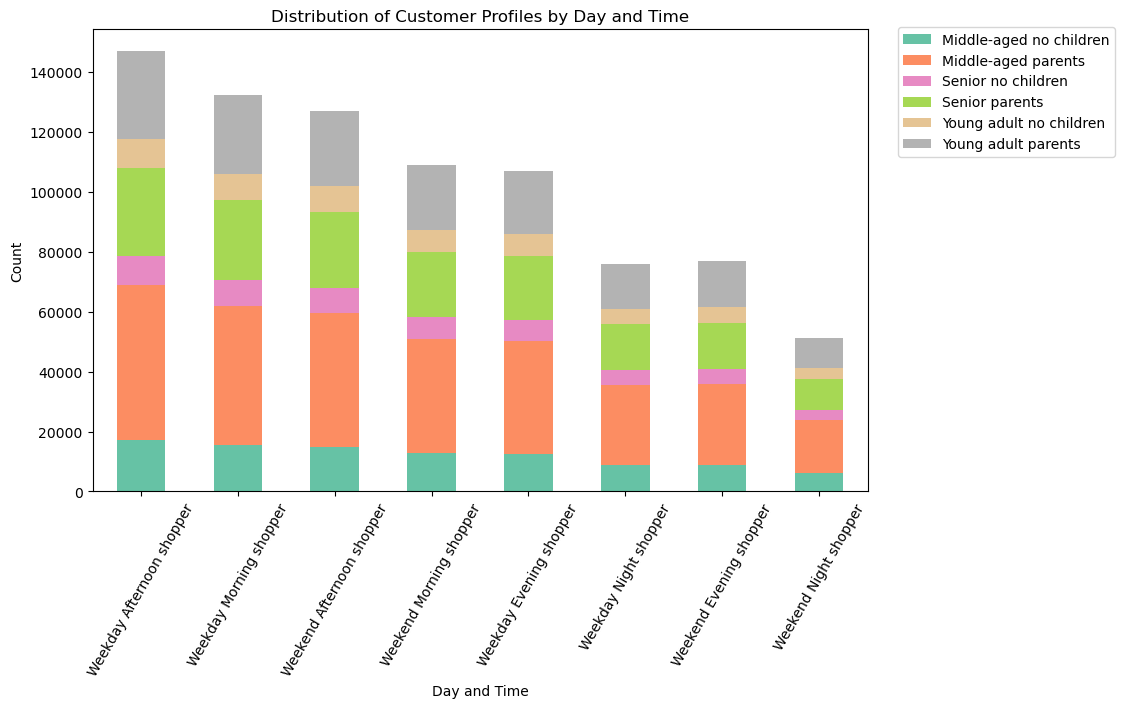

In [56]:
# Plot stacked chart

stacked_ord_prof = ords_prof_pivot.plot.bar(stacked = True, 
                                            colormap = 'Set2', 
                                            figsize=(10, 6), 
                                            rot = 60)

# Set labels and title
plt.xlabel('Day and Time')
plt.ylabel('Count')
plt.title('Distribution of Customer Profiles by Day and Time')
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')    

plt.show()

In [57]:
# Export chart
stacked_ord_prof.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profiles_distribution.png'),  bbox_inches='tight')

## 08. Usage Frequency and Expenditure

In [58]:
# Aggregate mean, min, and max of customer_profile by usage frequency
ords_prods_cust_1.groupby('customer_profile').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                                         mean  min   max
customer_profile                                        
Middle-aged no children             10.746304  0.0  30.0
Middle-aged parents                 10.835578  0.0  30.0
Senior no children                  10.768514  0.0  30.0
Senior parents                      10.799413  0.0  30.0
Young adult no children             10.895824  0.0  30.0
Young adult parents                 10.799683  0.0  30.0

In [59]:
# Aggregate mean, min, and max of customer_profile by expenditure
ords_prods_cust_1.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                             mean  min   max
customer_profile                            
Middle-aged no children  7.787486  1.0  25.0
Middle-aged parents      7.791271  1.0  25.0
Senior no children       7.801982  1.0  25.0
Senior parents           7.794990  1.0  25.0
Young adult no children  7.781024  1.0  25.0
Young adult parents      7.786299  1.0  25.0

## 09. Comparing Customer Profiles by Regions & Departments

### 09.1 Customer Profiles by Region

In [60]:
# Create crosstab to compare customer profiles across each region
cross_prof_reg = pd.crosstab(ords_prods_cust_1['region'], 
                            ords_prods_cust_1['customer_profile'],
                            normalize = 'index')

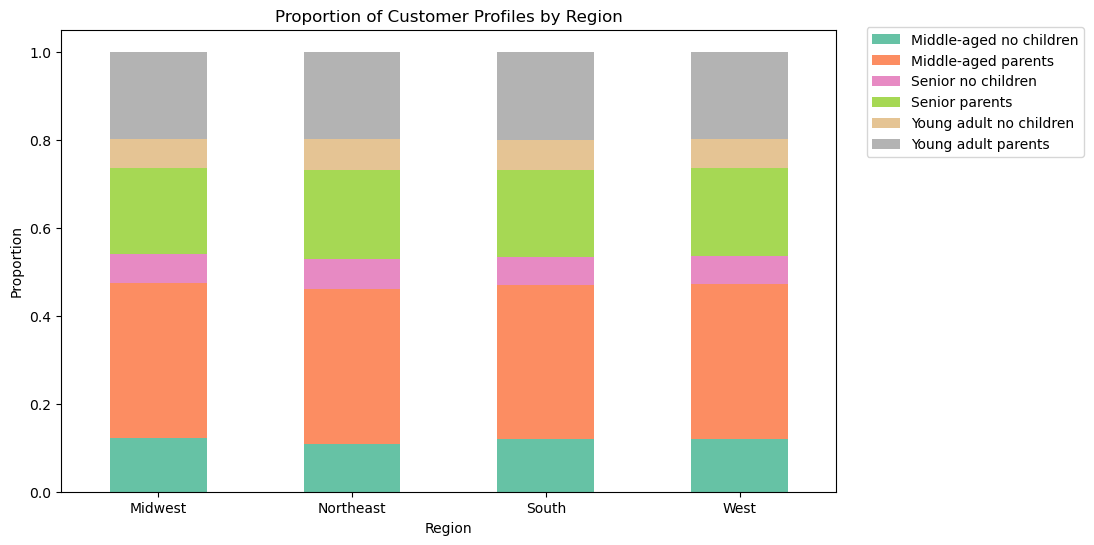

In [61]:
# Create stacked chart of regions sectioned by customer profiles
prof_region_stacked = cross_prof_reg.plot(kind='bar', 
                        stacked=True, 
                        colormap='Set2',
                        figsize=(10, 6),
                        rot = 0)

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Proportion of Customer Profiles by Region')
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')

plt.show()

In [62]:
# Export chart

prof_region_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profiles_region.png'),  bbox_inches='tight')

### 09.2 Customer Profile by Department

In [63]:
# Create crosstab to compare customer profiles across each department
cross_cust_dept = pd.crosstab(ords_prods_cust_1['department'],
                             ords_prods_cust_1['customer_profile'],
                            normalize = 'index')

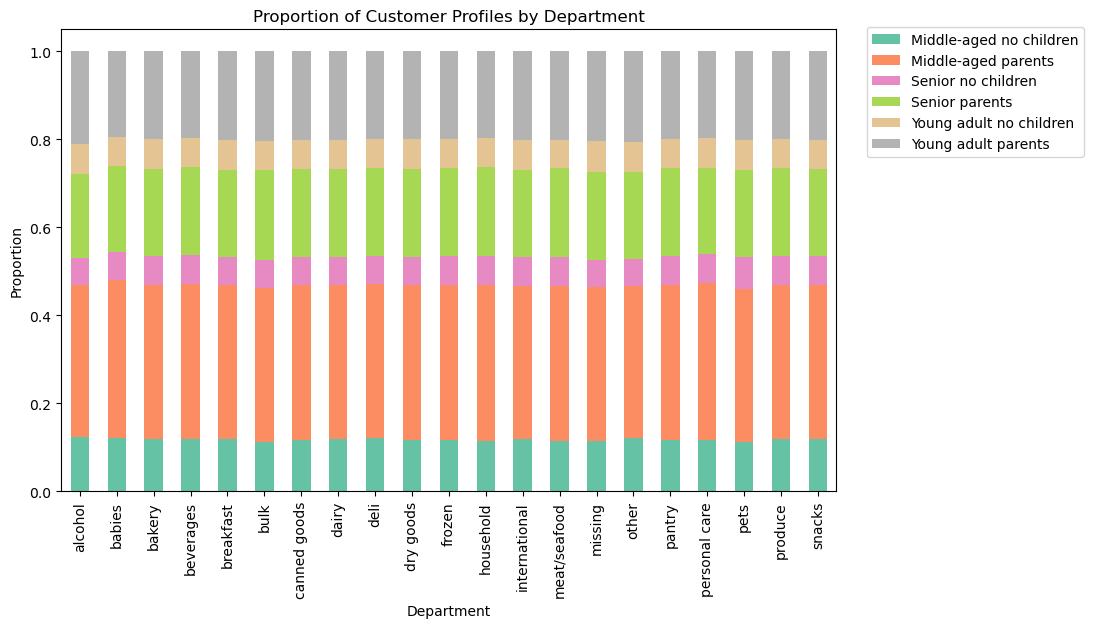

In [64]:
# Create stacked chart of departments sectioned by customer profiles
cust_prof_dept = cross_cust_dept.plot(kind='bar', 
                        stacked=True, 
                        colormap='Set2', 
                        figsize=(10, 6))

# Set labels and titles
plt.xlabel("Department")
plt.ylabel("Proportion")
plt.title('Proportion of Customer Profiles by Department')
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In both visualizations of customer profiles across regions and departments we have similar observations. In both, middle-aged parents make up the majority across all regions and departments. Furthermore, across each region and department there is little to no difference in the proportion that a certain demographic makes up.

In [65]:
# Export chart

cust_prof_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profiles_departments.png'),  bbox_inches='tight')

## 10. Key Question Visualizations

### 10.1 Busiest Days of the Week and Hours of the Day

The sales team needs to know what the busiest days of the week and hours of the
day are (i.e., the days and times with the most orders) in order to schedule ads at
times when there are fewer orders.

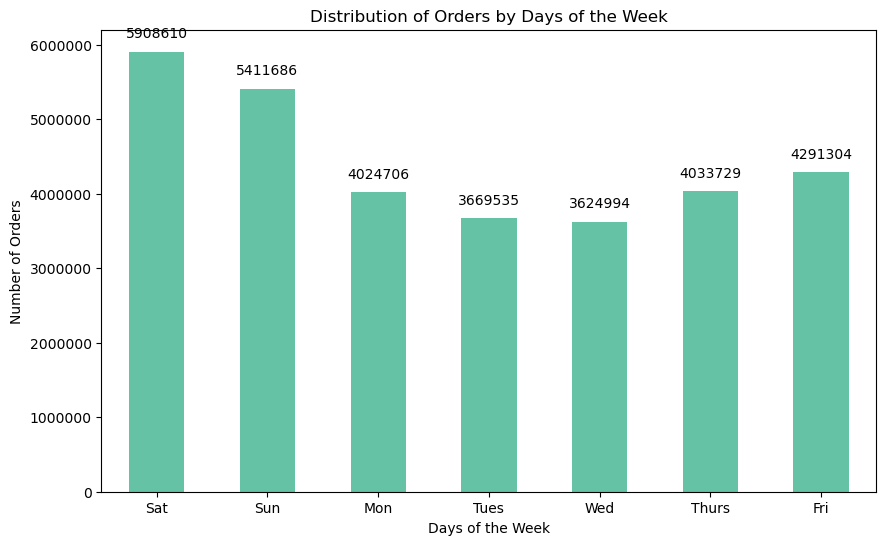

In [66]:
# Create bar chart using 'orders_day_of_the_week' column
busiest_day_bar = ords_prods_cust_1['orders_day_of_the_week'].value_counts().sort_index().plot.bar(colormap = 'Set2',
                                                                                                  figsize=(10,6),
                                                                                                  rot = 0)

# Set labels and titles
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Days of the Week')
busiest_day_bar.set_xticklabels( ('Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri'))
busiest_day_bar.bar_label(busiest_day_bar.containers[0], padding=8, fmt = '%d')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [67]:
# Export chart

busiest_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_day_bar.png'),  bbox_inches='tight')

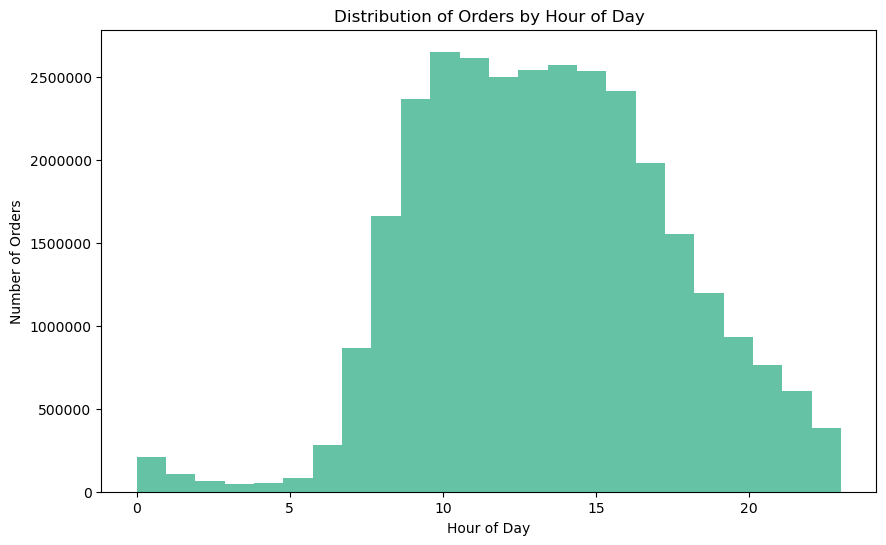

In [68]:
# Create bar chart using 'order_day_hour' column
busiest_hour_bar = ords_prods_cust_1['order_hour_of_day'].plot.hist(bins = 24,
                                                                    colormap = 'Set2',
                                                                    figsize=(10,6),
                                                                    rot = 0)

# Set labels and titles
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour of Day')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [69]:
# Export chart

busiest_hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_hour_bar.png'),  bbox_inches='tight')

### 10.2 Time of Day When People Spend the Most Money

They also want to know whether there are particular times of the day when people
spend the most money, as this might inform the type of products they advertise at
these times.

In [70]:
# Create subset of products bought at the busiest time of day (10am)
prod_4am = ords_prods_cust_1.loc[ords_prods_cust_1['order_hour_of_day'] == 4, 'product_name'].to_frame()

In [71]:
prod_4am

,product_name
11950,Organic Baby Spinach
11966,Russet Potato
11987,Chopped Garlic
12008,Fat Free Milk
12030,Asian Chopped Salad with Dressing
...,...
32402540,California Pinot Noir
32402559,Crunchy Peanut Butter Granola
32402579,Arroz Rice with Vegetables
32402595,Meatloaf


In [72]:
# Create crosstab of product and frequency at 10 am
cross_prod_4am = pd.crosstab(prod_4am['product_name'], columns ='count')

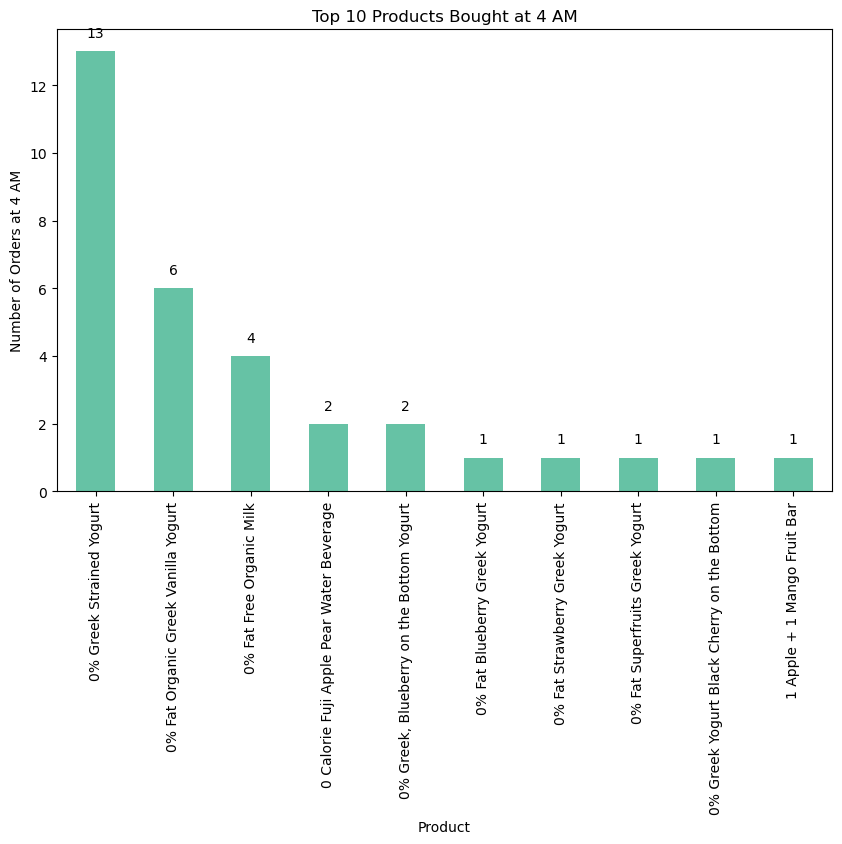

In [73]:
# Create chart of crosstab
top_10_prod_4am = cross_prod_4am.iloc[:10].sort_values(by='count', ascending=False).plot.bar(colormap = 'Set2',
                                        figsize=(10,6),
                                        legend = False)

# Set labels and title
plt.xlabel('Product')
plt.ylabel('Number of Orders at 4 AM')
plt.title('Top 10 Products Bought at 4 AM')
plt.ticklabel_format(style='plain', axis='y')
top_10_prod_4am.bar_label(top_10_prod_4am.containers[0], padding=8, fmt = '%d')

plt.show()

In [74]:
# Export chart

top_10_prod_4am.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_10_prod_4am.png'),  bbox_inches='tight')

### 10.3 Simpler Price groupings

Instacart has a lot of products with different price tags. Marketing and sales want to
use simpler price range groupings to help direct their efforts.

Text(0.5, 1.0, 'Distribution of Price groups')

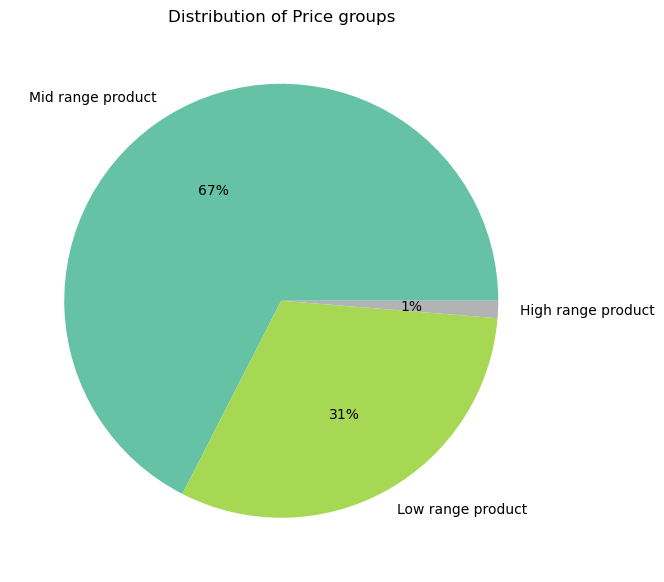

In [75]:
# Pie chart of price groupings 

price_group_pie = ords_prods_cust_1['price_range_loc'].value_counts().plot.pie(colormap='Set2', 
                                                                               figsize=(7,8),
                                                                              autopct = '%1.0f%%')

# Set labels and titles
plt.ylabel('')
plt.title('Distribution of Price groups')


In [76]:
# Export pie chart

price_group_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_group_pie.png'),  bbox_inches='tight')

### 10.4 Popular products

Are there certain types of products that are more popular than others? The marketing
and sales teams want to know which departments have the highest frequency of
product orders.

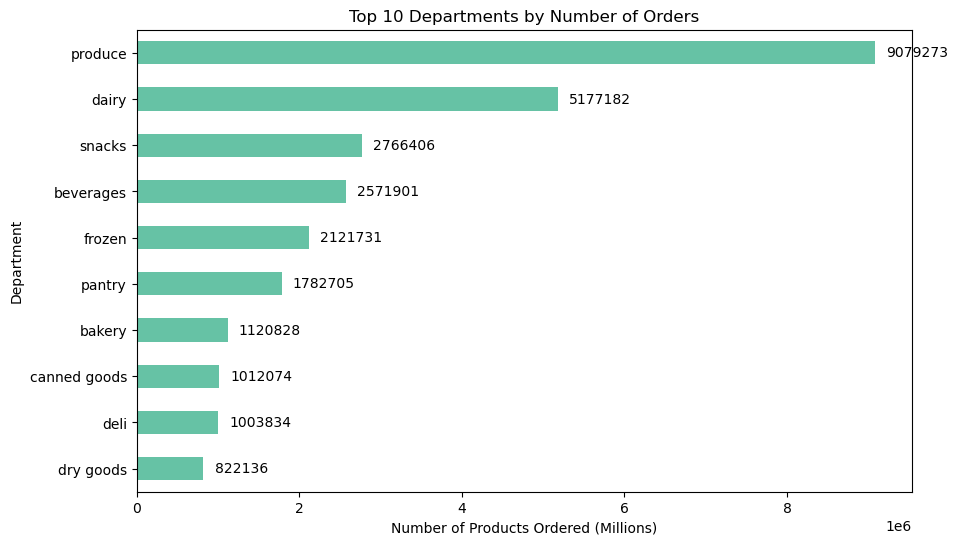

In [77]:
# Create bar chart of top 10 departments in terms of frequency of product orders

fig, ax = plt.subplots()
top_10_depts = ords_prods_cust_1['department'].value_counts().iloc[:10].sort_values(ascending = True).plot.barh(colormap='Set2', 
                                                                                                          figsize=(10, 6))

# Set labels and title
plt.xlabel('Number of Products Ordered (Millions)')
plt.ylabel('Department')
plt.title('Top 10 Departments by Number of Orders')
top_10_depts.bar_label(top_10_depts.containers[0], padding=8, fmt = '%d')

plt.show()

In [78]:
# Export graph

top_10_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_10_departments.png'),  bbox_inches='tight')

### 10.5 Brand Loyalty

What’s the distribution among users in regards to their brand loyalty (i.e., how
often do they return to Instacart)?

Text(0.5, 1.0, 'Distribution of Customers by Brand Loyalty')

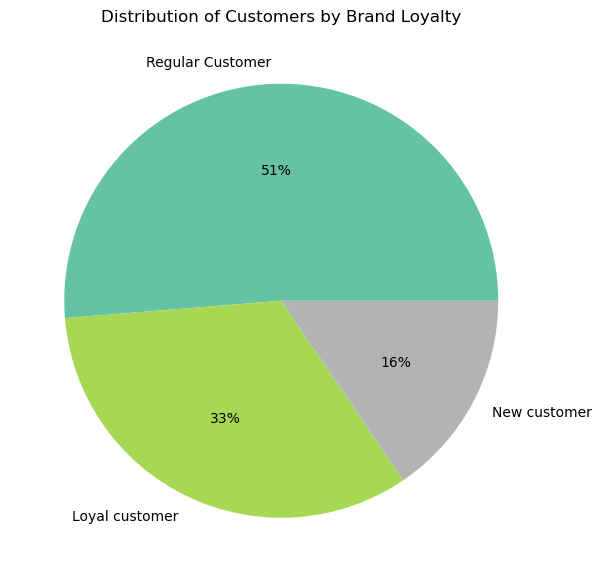

In [79]:
# Create pie chart using the "loyalty_flag" columns

loyalty_pie = ords_prods_cust_1['loyalty_flag'].value_counts().plot.pie(colormap='Set2', 
                                                                               figsize=(7,8),
                                                                              autopct = '%1.0f%%')

# Set labels and title
plt.ylabel('')
plt.title('Distribution of Customers by Brand Loyalty')


In [80]:
# Export pie chart

loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_pie.png'),  bbox_inches='tight')

### 10.6 Order Habits Based on Customer Loyalty Status

Are there differences in ordering habits based on a customer’s loyalty status?

#### 10.6.1 Ordering Habits Based on Customer Loyalty Status by Day

In [81]:
# Create cross tab to compare habits of customer of different loyalty status by day
cross_loyalty_day = pd.crosstab(ords_prods_cust_1['orders_day_of_the_week'], ords_prods_cust_1['loyalty_flag'])

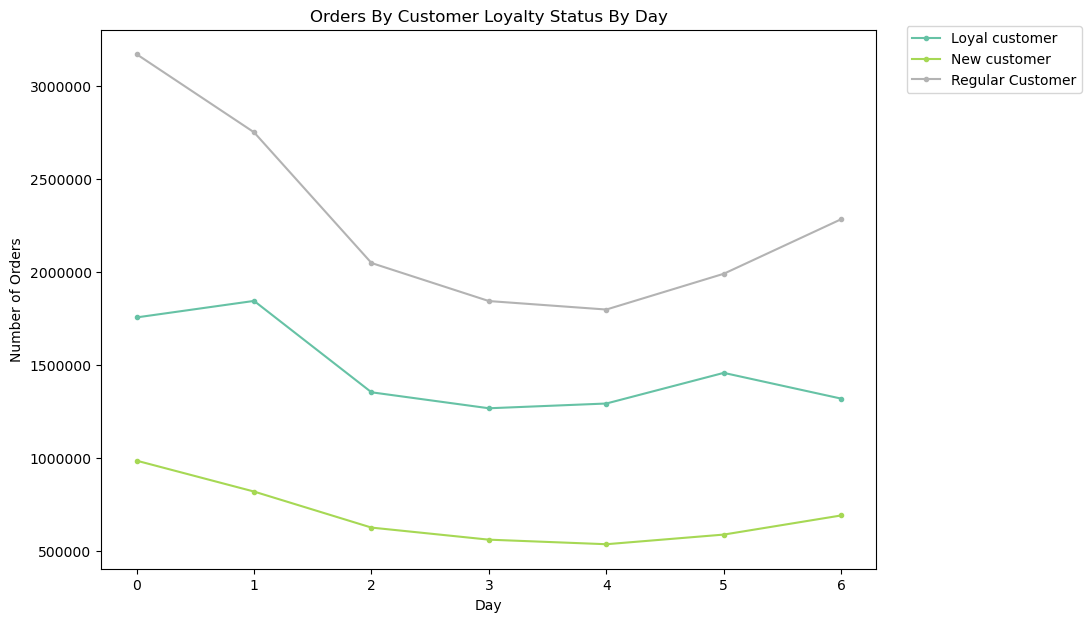

In [82]:
# Create line plot of customer ordering habits by day using "order_day_of_the_week" column
loyalty_day_line = cross_loyalty_day.plot(kind = 'line',
                                     colormap = 'Set2',
                                     figsize=(10,7),
                                     style = '.-')

# Set labels and title
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.title("Orders By Customer Loyalty Status By Day")
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [83]:
# Export line graph

loyalty_day_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_day_line.png'),  bbox_inches='tight')

#### 10.6.2 Ordering Habits Based on Customer Loyalty Status by Hour

In [84]:
# Create cross tab to compare habits of customer of different loyalty status by hour
cross_loyalty_hour =pd.crosstab(ords_prods_cust_1['order_hour_of_day'], ords_prods_cust_1['loyalty_flag'])

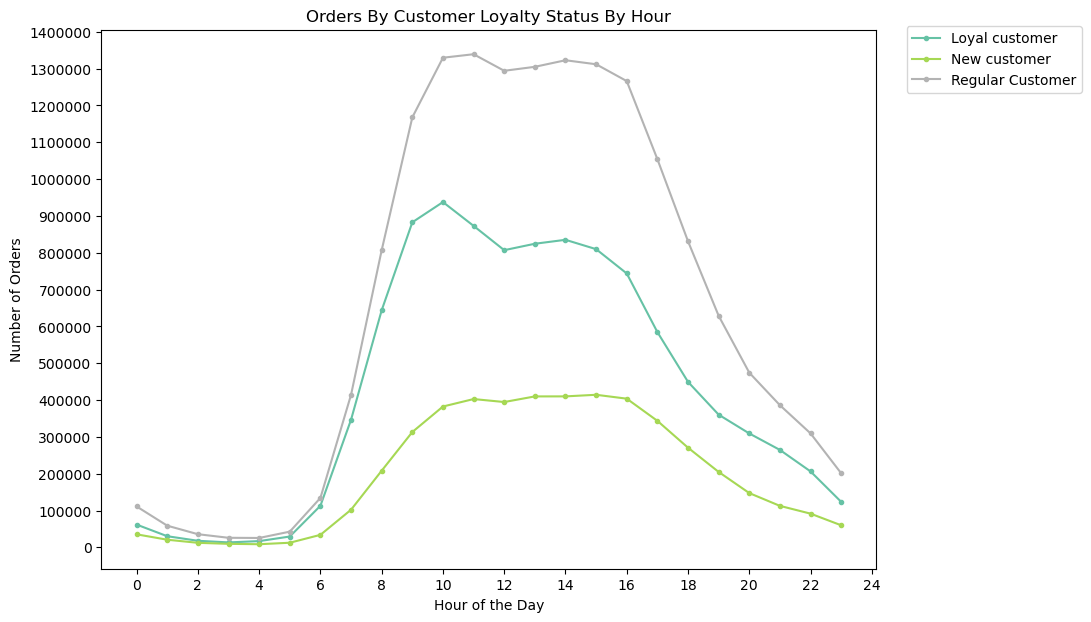

In [85]:
# Create line plot of customer ordering habits by hour using "order_hour_of_day" column
loyalty_hour_line = cross_loyalty_hour.plot(kind = 'line',
                                     colormap = 'Set2',
                                     figsize=(10,7),
                                     style = '.-')

# Set labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Orders By Customer Loyalty Status By Hour")
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')
loyalty_hour_line.locator_params(nbins=24)

plt.show()

In [86]:
# Export line graph

loyalty_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_hour_line.png'),  bbox_inches='tight')

#### 10.6.3 Ordering Habits Based on Customer Loyalty Status by Department

In [87]:
# Create cross tab to see if customers of different loyalty status prefer different departments
cross_loyalty_dept =pd.crosstab(ords_prods_cust_1['department'], ords_prods_cust_1['loyalty_flag'])

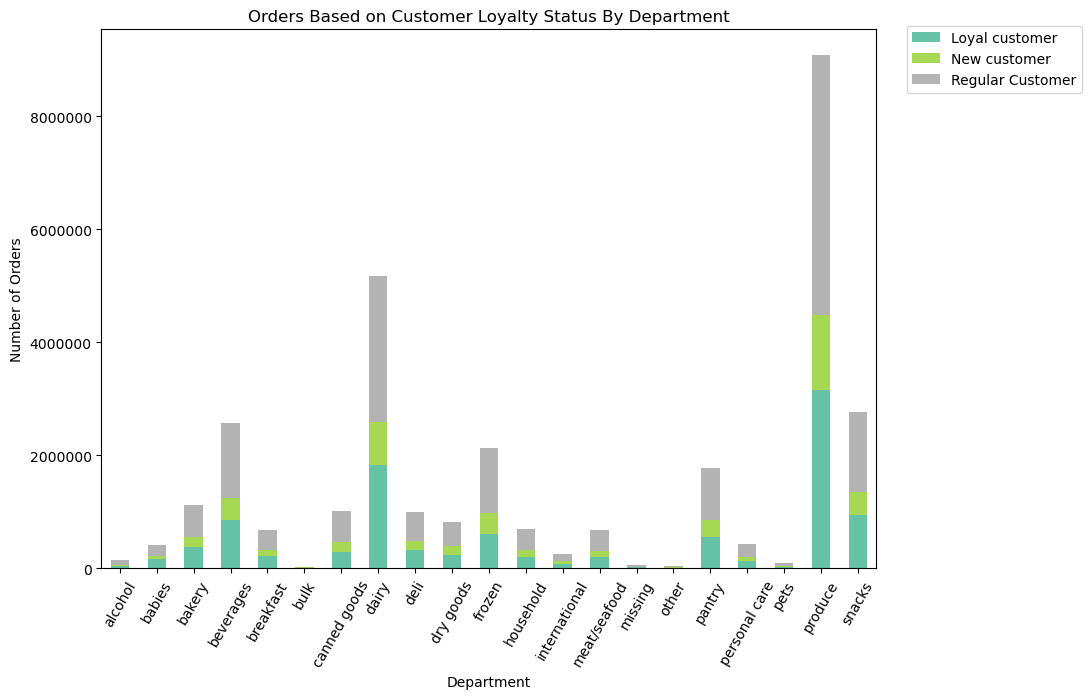

In [88]:
# Create bar plot of customer ordering habits by department using "department" column
loyalty_dept_bar = cross_loyalty_dept.plot(kind = 'bar',
                                            stacked = 'true',
                                            colormap = 'Set2',
                                            figsize=(10,7),
                                            style = '.-',
                                            rot = 60)
                                            

# Set labels and title
plt.xlabel("Department")
plt.ylabel("Number of Orders")
plt.title("Orders Based on Customer Loyalty Status By Department")
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')

dept_list = cross_loyalty_dept.index.tolist()
plt.xticks(ticks= range(0,len(dept_list)), labels = dept_list)


plt.show()

In [89]:
# Export chart

loyalty_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dept_bar.png'),  bbox_inches='tight')

### 10.7 Ordering Habits Based on Customer's Region

Are there differences in ordering habits based on a customer’s region?

#### 10.7.1 Ordering Habits Based on Customer's Region by Day

In [90]:
# Create cross tab to compare habits of customers based on region by day
cross_region_day = pd.crosstab(ords_prods_cust_1['orders_day_of_the_week'], ords_prods_cust_1['region'])

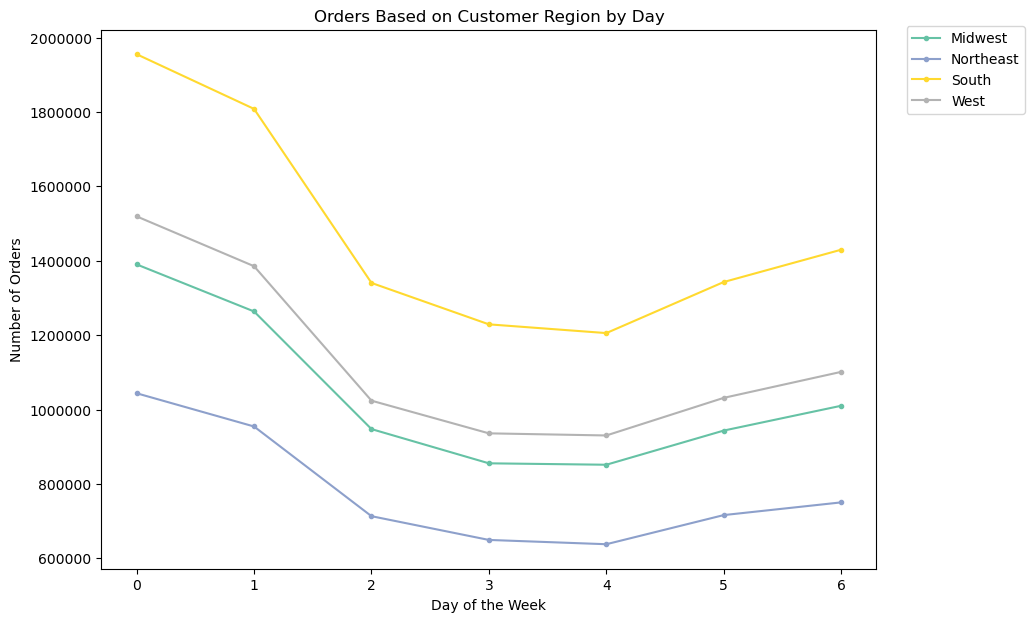

In [91]:
# Create line plot of customer ordering habits by region and day
region_day_line = cross_region_day.plot(kind = 'line',
                                     colormap = 'Set2',
                                     figsize=(10,7),
                                     style = '.-')

# Set labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.title("Orders Based on Customer Region by Day")
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [92]:
# Export line graph

region_day_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_day_line.png'),  bbox_inches='tight')

#### 10.7.2 Ordering Habits Based on Customer's Region by Hour

In [93]:
# Create cross tab to compare habits of customers based on region by hour
cross_region_hour = pd.crosstab(ords_prods_cust_1['order_hour_of_day'], ords_prods_cust_1['region'])

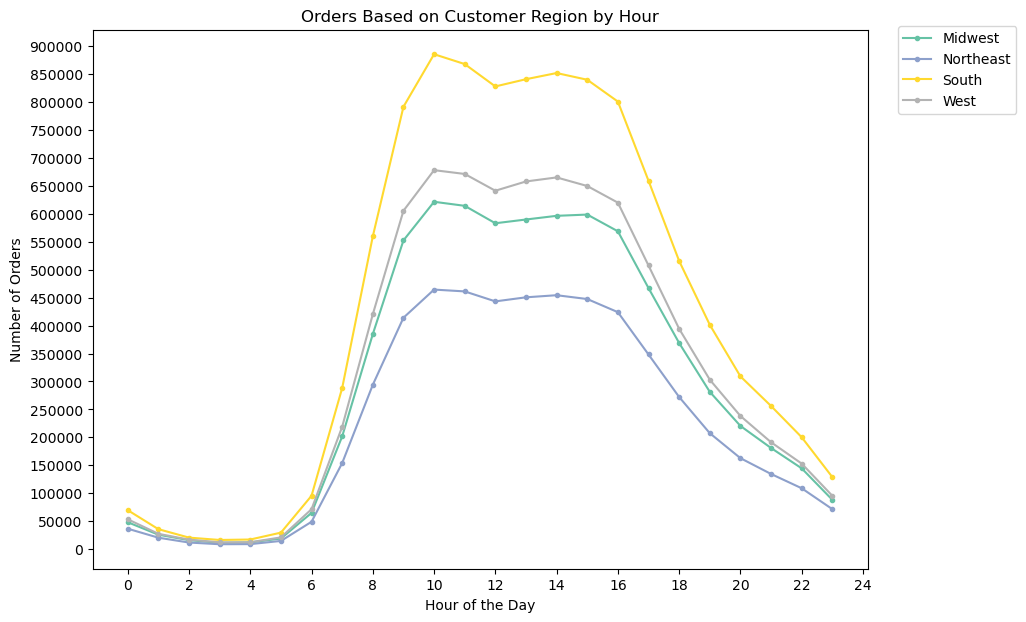

In [94]:
# Create line plot of customer ordering habits by region and hour
region_hour_line = cross_region_hour.plot(kind = 'line',
                                     colormap = 'Set2',
                                     figsize=(10, 7),
                                     style = '.-')
# Set labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Orders Based on Customer Region by Hour")
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')
region_hour_line.locator_params(nbins=24)

plt.show()

In [95]:
# Export line graph

region_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_hour_line.png'),  bbox_inches='tight')

### 10.8 Relationship Between Age and Family Status Based on Ordering Habits

Is there a connection between age and family status in terms of ordering habits?

In [96]:
# Create cross tab to see if orders of customer in different regions prefer different departments
cross_age_day = pd.crosstab([ords_prods_cust_1['orders_day_of_the_week'], ords_prods_cust_1['age_group']], ords_prods_cust_1['martial_status'])

In [97]:
cross_age_day

martial_status                      divorced/widowed  \
orders_day_of_the_week age_group                       
0                      Middle-aged            116567   
                       Senior                 385939   
                       Young adult                 0   
1                      Middle-aged            110849   
                       Senior                 348349   
                       Young adult                 0   
2                      Middle-aged             81615   
                       Senior                 262224   
                       Young adult                 0   
3                      Middle-aged             71982   
                       Senior                 243338   
                       Young adult                 0   
4                      Middle-aged             71777   
                       Senior                 234927   
                       Young adult                 0   
5                      Middle-aged             85444   
                       Senior                 262990   
                       Young adult                 0   
6                      Middle-aged             85079   
                       Senior                 284191   
                       Young adult                 0   

martial_status                      living with parents and siblings  married  \
orders_day_of_the_week age_group                                                
0                      Middle-aged                                 0  2067086   
                       Senior                                      0  1180305   
                       Young adult                            280828   903313   
1                      Middle-aged                                 0  1898433   
                       Senior                                      0  1069146   
                       Young adult                            259482   822275   
2                      Middle-aged                                 0  1420111   
                       Senior                                      0   802946   
                       Young adult                            192366   606702   
3                      Middle-aged                                 0  1288836   
                       Senior                                      0   735012   
                       Young adult                            174418   554227   
4                      Middle-aged                                 0  1274268   
                       Senior                                      0   721234   
                       Young adult                            173214   551019   
5                      Middle-aged                                 0  1406585   
                       Senior                                      0   803125   
                       Young adult                            195460   614385   
6                      Middle-aged                                 0  1517241   
                       Senior                                      0   861818   
                       Young adult                            205404   645644   

martial_status                      single  
orders_day_of_the_week age_group            
0                      Middle-aged  583268  
                       Senior            0  
                       Young adult  391304  
1                      Middle-aged  527729  
                       Senior            0  
                       Young adult  375423  
2                      Middle-aged  393254  
                       Senior            0  
                       Young adult  265488  
3                      Middle-aged  359062  
                       Senior            0  
                       Young adult  242660  
4                      Middle-aged  354070  
                       Senior            0  
                       Young adult  244485  
5                      Middle-aged  401628  
                       Senior        

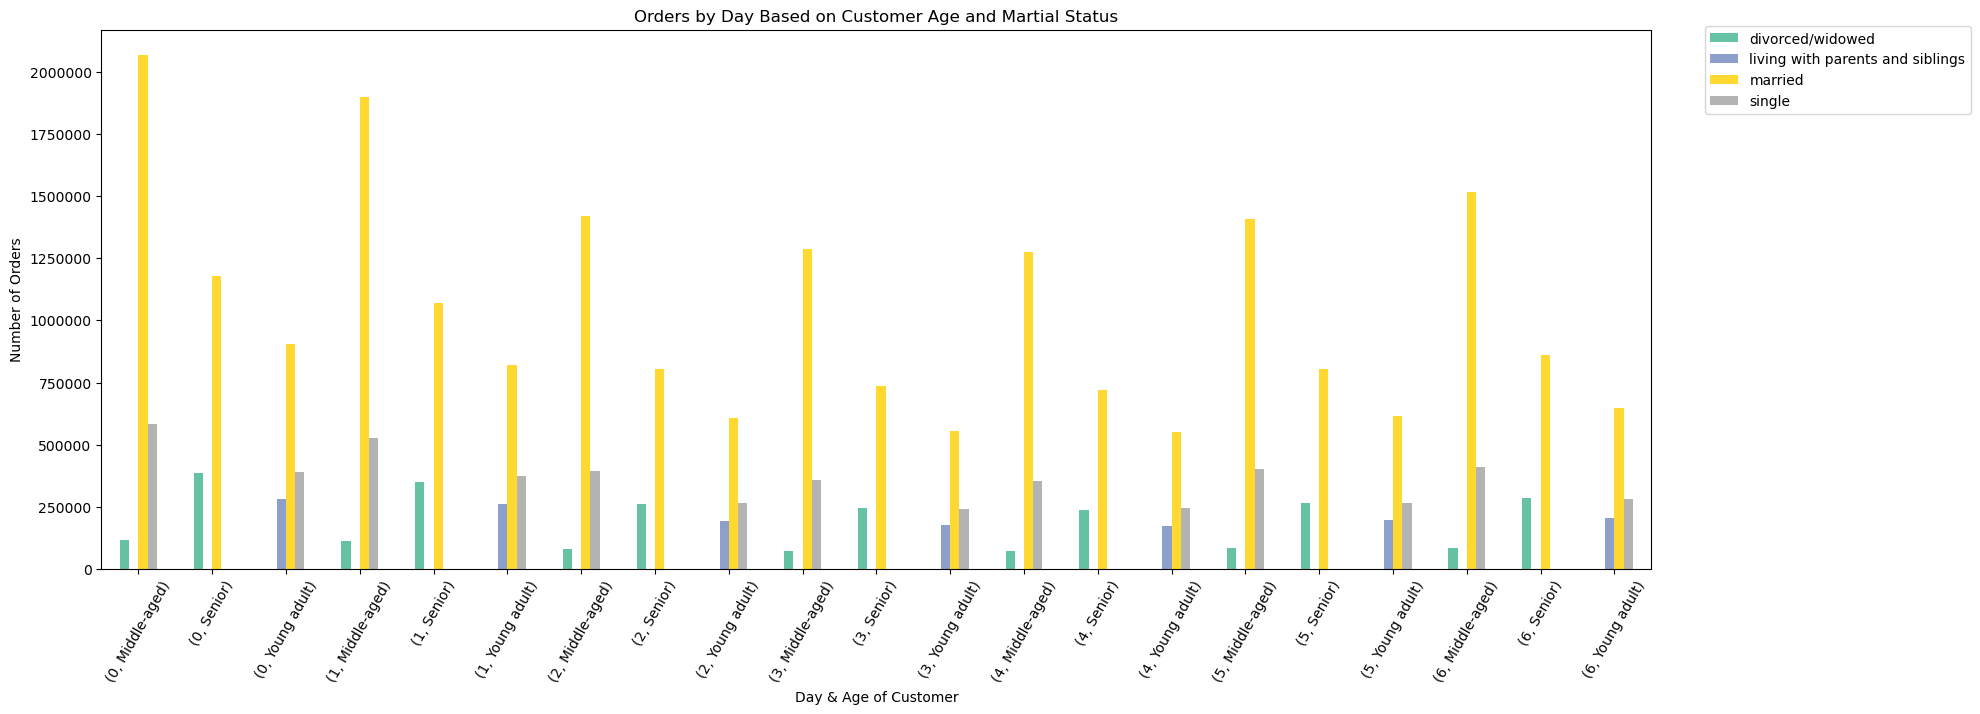

In [98]:
# Create bar chart of 
cross_age_day = cross_age_day.plot(kind = 'bar',
                                     colormap = 'Set2',
                                     figsize=(20, 7),
                                     rot = 60)

# Set labels and title                                   
plt.xlabel("Day & Age of Customer")
plt.ylabel("Number of Orders")
plt.title("Orders by Day Based on Customer Age and Martial Status")
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [99]:
# Export chart

cross_age_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cross_age_day.png'),  bbox_inches='tight')

### 10.9 Ordering Habits of Based on Customer Profiles

What differences can you find in ordering habits of different customer
profiles? Consider the price of orders, the frequency of orders, the products
customers are ordering, and anything else you can think of.

#### 10.9.1 Ordering Habits of Customer Profiles Based on Price of Orders

In [100]:
# Create cross tab to see order habits of customer profiles based on price of orders
cross_price_cust = pd.crosstab(ords_prods_cust_1['price_range_loc'], ords_prods_cust_1['customer_profile'])

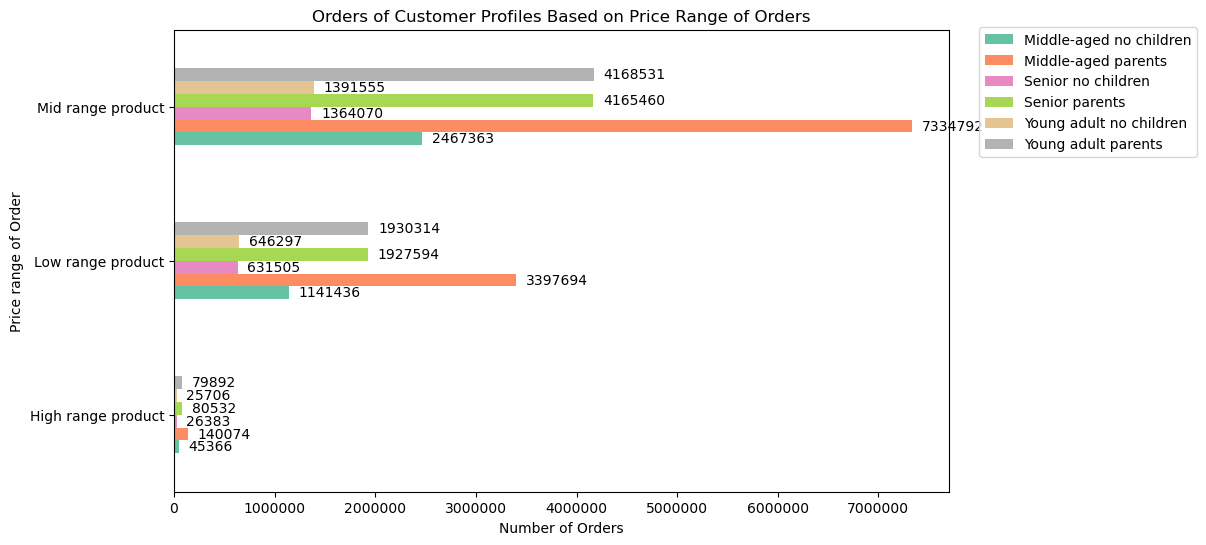

In [101]:
# Create bar chart of price range of orders by number of orders
price_cust_bar = cross_price_cust.plot.barh(colormap='Set2', 
                                           figsize=(10, 6))
# Set labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Price range of Order')
plt.title('Orders of Customer Profiles Based on Price Range of Orders')
plt.ticklabel_format(style='plain', axis='x')
price_cust_bar.bar_label(price_cust_bar.containers[0], padding=7, fmt = '%d')
price_cust_bar.bar_label(price_cust_bar.containers[1], padding=7, fmt = '%d')
price_cust_bar.bar_label(price_cust_bar.containers[2], padding=7, fmt = '%d')
price_cust_bar.bar_label(price_cust_bar.containers[3], padding=7, fmt = '%d')
price_cust_bar.bar_label(price_cust_bar.containers[4], padding=7, fmt = '%d')
price_cust_bar.bar_label(price_cust_bar.containers[5], padding=7, fmt = '%d')
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')

plt.show()

In [102]:
# Export chart

price_cust_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_cust_bar.png'),  bbox_inches='tight')

#### 10.9.2 Ordering Habits of Customer Profiles Based on Product

In [103]:
# Create cross tab to see order habits of customer profiles based on product
cross_dept_prof =pd.crosstab(ords_prods_cust_1['department'], ords_prods_cust_1['customer_profile'])

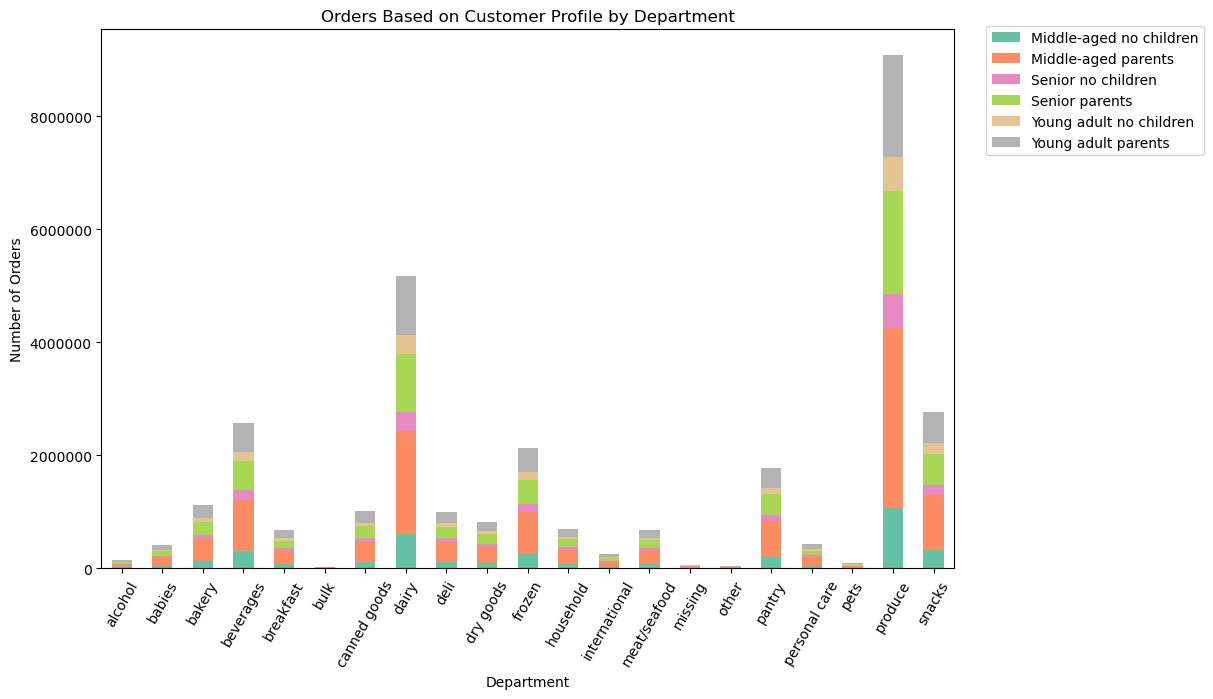

In [104]:
# Create bar plot of orders by products and customer profiles
dept_prof_bar = cross_dept_prof.plot(kind = 'bar',
                                     stacked = 'true',
                                     colormap = 'Set2',
                                     figsize=(11, 7),
                                     style = '.-',
                                     rot = 60)  

# Set labels and title
plt.xlabel("Department")
plt.ylabel("Number of Orders")
plt.title("Orders Based on Customer Profile by Department")
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')

dept_list = cross_dept_prof.index.tolist()
plt.xticks(ticks= range(0,len(dept_list)), labels = dept_list)

plt.show()

In [105]:
# Export chart

dept_prof_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_prof_bar.png'),  bbox_inches='tight')

## Export Final Dataframe

In [106]:
# Export the final dataframe

ords_prods_cust_1.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_final.pkl'))

MemoryError: 

## Cannot export final dataframe due to memory error